#  **UNDERSTANDING LOGISTIC REGRESSION II**
Logistic Regression is a Machine Learning **classification** algorithm that is used to predict the probability of a **categorical** dependent variable. 
In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.

The logistic regression formula is derived from the standard linear equation for a straight line: **y=mx + b**. Using the Sigmoid function, the standard linear formula is transformed to the logistic regression formula. This logistic regression function is useful for predicting the class of a binomial target feature.


</br>

## **Assumptions in Logistic Regression**
We will need to presume some assumptions before addressing the model:
* Tha targe variable is **binary**
* Predective features might be continuous or categorical values
* Features are **independent from one another**

We need to be carefull with the last point, since adding logistic variables  to a logistic regression model will always increase the amount of variance explained in the log odds. On the other hand, adding more and more features to the model might result in overfitting.

</br>

## **For what should I use Logistic Regression?**
There are some cases that logistic regression could cover. In a nutshell, Logistic Regression is the appropriate regression analysis to conduct when the dependent variable is binary. So some examples of the question it aswers are things like 
- _What is the porbability of getting lung cancer giving certain conditions/parameters?_
- _Do body weight, calorie intake, fat intake, and age have an influence on the probability of having a heart attack_
- _Will my customer get my offer?_

Note that the answer to all these questions are either **yes** or **not**, proving that is used to describe data and to explain the relationship between **one dependent binary variable** and one or more nominal, ordinal, interval or ratio-level independent variables..


In [79]:
# Imports 

# EDA & Visualization
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import sklearn

# Model
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


## **1. Loading Data**
We are going to use [this dataset](https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv) that contains the information relative to the Titanic disaster in 1912 and their passengers. This exercise is based on [the kaggle competition](https://www.kaggle.com/c/titanic/overview) where we're asked what sorts of passengers were likely to survive the tragedy using machine learning. So its our job to predict if a passenger survived from the sinking Titanic or not.

</br>

The first thing we are going to do is to read such dataset and put the data into a dataframe

In [80]:
url_dataset = 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
data = pd.read_csv(url_dataset)

# Clean up the dataset dropping the NA values
data.dropna()
print("{} values with {} categories \n".format(data.shape[0], data.shape[1]))
print(data.columns)


891 values with 12 categories 

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [81]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Ok, so we can see our dataset as 891 values with 12 categories expressed in each of the columns of the dataframe.

## **2. Data Exploration**
Since we have to predict survival probability of passangers from the Titanic, our target is going to be _Survived_ variable from the titanic dataframe. We can see that the Survived variable is binary (0 - did not survive / 1 - survived)

In [82]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

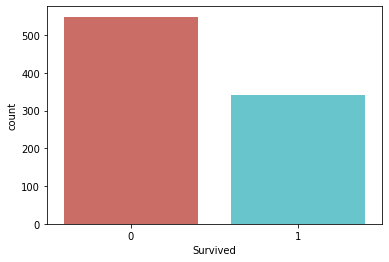

In [83]:
sb.countplot(x='Survived',data=data, palette='hls')

In [84]:
# Check for missing values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [85]:
# General info in our dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Ok, so we got 891 rows in the titanic data frame. Cabin is almost all missing values (687 null values and 204 non null), so we can drop that variable completely, but what about age? Age seems like a relevant predictor for survival right? We'd want to keep the variables, but it has 177 missing values. We are going to need to find a way to approximate for those missing values.

### **2.1 Missing Values**
Let's just gor through the infor we have about our data, go ahead and drop all the variables that aren't relevant for predicting survival. We should at least keep the following:

* **Survived** - Obviously relevant.
* **Pclass** - Does a passenger's class on the boat affect their survivability?
* **Sex** - Could a passenger's gender impact their survival rate?
* **Age** - Does a person's age impact their survival rate?
* **SibSp** - Does the number of relatives on the boat (that are siblings or a spouse) affect a person survivability? 
* **Parch** - Does the number of relatives on the boat (that are children or parents) affect a person survivability? 
* **Fare** - Does the fare a person paid effect his survivability? ...Maybe - let's keep it.
* **Embarked** - Does a person's point of embarkation matter? It depends on how the boat was filled... Let's keep it.

</br>

What about a person's name, ticket number, and passenger ID number? They're irrelavant for predicting survivability. And as you recall, the cabin variable is almost all missing values, so we can just drop all of these

In [86]:
data = data.drop(['PassengerId','Name','Ticket','Cabin'], 1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Now we have a dataset reduced to the relevan values, but still we need to deal with the missing values in age.

### **2.2 Visualization**

Let's see the relationship between the variables of a passanger age an their class

In [122]:
def age_correlation_plot(merged, nrows = 2, ncols = 3):
  '''
  Create a boxplot to view the variables correlated with Age
  Args:
    merged Dataset with the inputed variables we are interested in
    nrows Number of rows in the figure. 2 by default
    ncols Number of cols in the figure. 3 by default
  
  '''
  toSearch = merged.loc[:, ["Sex", "Pclass", "Embarked", "Parch","SibSp", "Fare"]]

  fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize = (12,12))

  for ax, column in zip(axes.flatten(), toSearch.columns):
      sb.boxplot(x = toSearch[column], y = merged.Age, ax = ax)
      ax.set_title(column, fontsize = 18)
      ax.tick_params(axis = "both", which = "major", labelsize = 12)
      ax.tick_params(axis = "both", which = "minor", labelsize = 12)
      ax.set_ylabel("Age", fontsize = 12)
      ax.set_xlabel("")
  fig.suptitle("Variables Associated with Age", fontsize = 30)
  fig.tight_layout(rect = [0, 0.03, 1, 0.95])


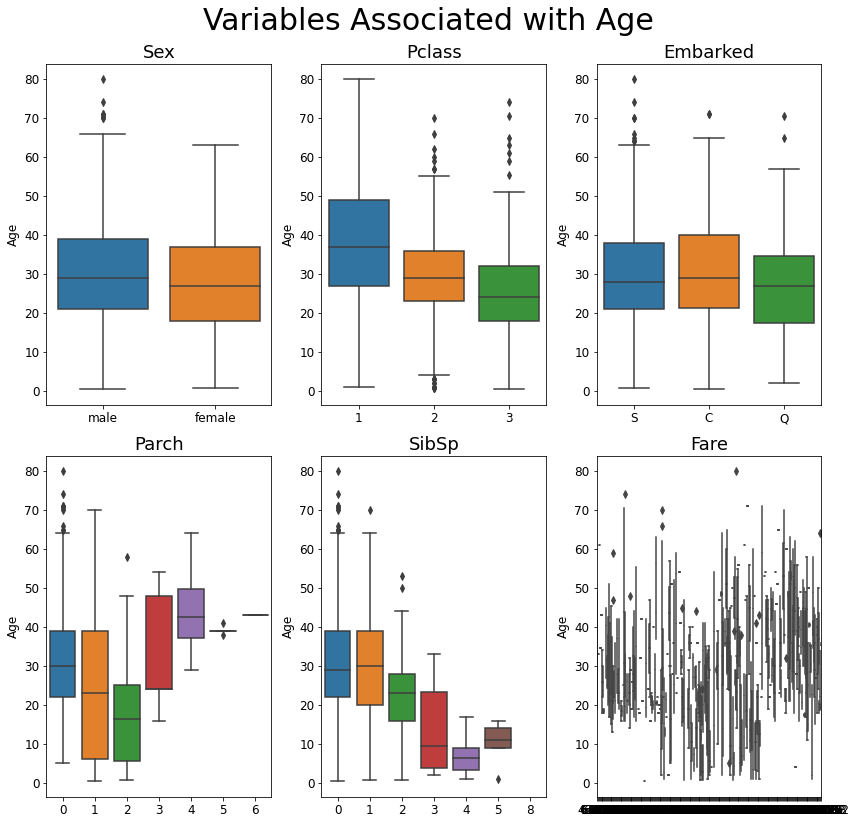

In [109]:
age_correlation_plot(data)

* Age distribution seems to be the same in male and female subpopulations of Sex and S, C, Q subpopulations of Embarked. So **Sex and Embarked aren't good predictors for Age**.

* On the other hand, Age distribution seems to be distinct in Pclass's 1, 2 and 3 subpopulations, so **Pclass is informative to predict Age**.

* Finally, Age distribution seems to be distinct in different categories for nameProcessed, familySize, SibSp, Parch, and cabinProcessed. So they might be good predictors for Age as well.

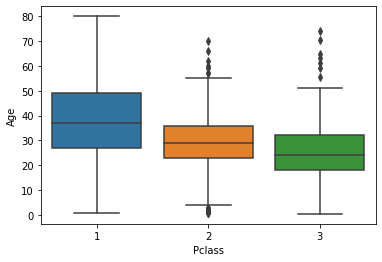

In [9]:
sb.boxplot(x='Pclass', y='Age', data=data)


Looking closer at the correlation with Pclass, it seems the average age for 1st class passenger is around 40, 2nd class is 29 and 3rd class is 24
Se the conclussion so far is, the younger a passenger is, more likely it's for them to be in 3rd class, and on the contrary, the older a passenger is, more likely is for them to be in 1st class.

In [113]:
def guess_age(cols):
  '''
  Aproximate the age through the Pclass variable for each null value found in age
  Parameters:
    cols

  Return:
    age

  '''
  Age = cols[0]
  Pclass = cols[1]
  
  if pd.isnull(Age):
      if Pclass == 1:
          return 37
      elif Pclass == 2:
          return 29
      else:
          return 24
  else:
      return Age

In [114]:
# And we apply the function 

data['Age'] = data[['Age', 'Pclass']].apply(guess_age, axis=1)
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

There are no more null values in age var, and regarding those 2 null values in _Embarked_ we can get rid of them.

In [115]:
data.dropna(inplace=True)
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### **2.2.1 One Hot Encode**
We need to reformat our variables so that they work with the model. Specifically, we need to reformat the Sex and Embarked variables into numeric variables.

In [116]:
gender = pd.get_dummies(data['Sex'],drop_first=True)
gender.head()

,male
0,1
1,0
2,0
3,0
4,1


In [117]:
embark_location = pd.get_dummies(data['Embarked'],drop_first=True)
embark_location.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [118]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [119]:
# Drop the non categorical values
data.drop(['Sex', 'Embarked'],axis=1,inplace=True)

# Concat them with the new columns transformed to categorical (dummy values)
data_categorical = pd.concat([data,gender,embark_location],axis=1)
data_categorical.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


### **2.2.2 Check the independence between features**

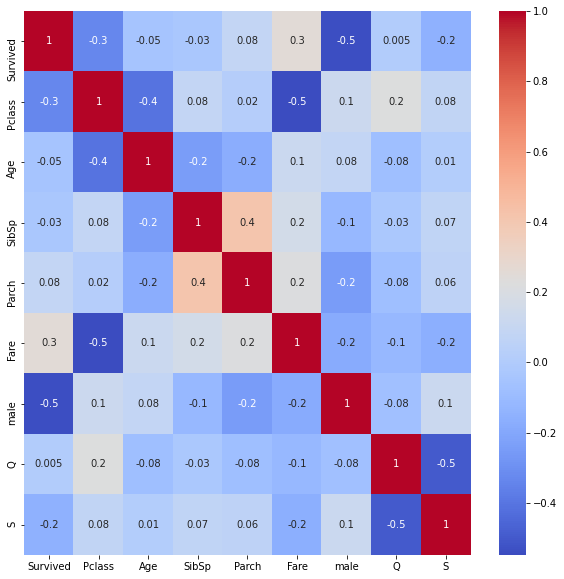

In [131]:
plt.subplots(figsize=(10,10))
sb.heatmap(data_categorical.corr(), annot = True, fmt='.1g', cmap= 'coolwarm')  

Fare and Pclass are not independent of each other, so let's drop these ones.

In [132]:
data_categorical.drop(['Fare', 'Pclass'],axis=1, inplace=True)
data_categorical.head()

,Survived,Age,SibSp,Parch,male,Q,S
0,0,22.0,1,0,1,0,1
1,1,38.0,1,0,0,0,0
2,1,26.0,0,0,0,0,1
3,1,35.0,1,0,0,0,1
4,0,35.0,0,0,1,0,1


We have 6 predictive features that remain. The rule of thumb is 50 records per feature and we quite modify the original dataset... so we need to have at least 300 records in this dataset. Let's check again

In [133]:
data_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Age       889 non-null    float64
 2   SibSp     889 non-null    int64  
 3   Parch     889 non-null    int64  
 4   male      889 non-null    uint8  
 5   Q         889 non-null    uint8  
 6   S         889 non-null    uint8  
dtypes: float64(1), int64(3), uint8(3)
memory usage: 37.3 KB


And with 889 values we got green light!

## **3. The model**
### **3.1 Define the model**
We proceed now to split the test and train set. 

In [134]:
# All the columns but the target var: Survived
x_cols = data_categorical.columns.drop('Survived')

X = data_categorical[x_cols].values
y = data_categorical['Survived'].values

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=25)

### **3.2 Deploy the model**

In [136]:
model = LogisticRegression()
history = model.fit(X_train, y_train)

print(history)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


### **3.3 Evaluate & Predict**

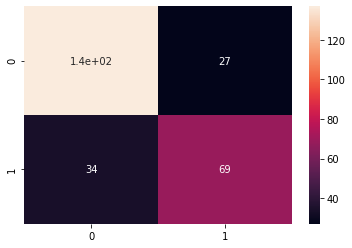

In [138]:
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
sb.heatmap(conf_matrix, annot=True)

As we can see in the confusion matrix, 137 and 69 are the number of correct predictions. 34 and 27 are the number of incorrect predictions.

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       164
           1       0.72      0.67      0.69       103

    accuracy                           0.77       267
   macro avg       0.76      0.75      0.76       267
weighted avg       0.77      0.77      0.77       267



REFERENCES
* [Exercise titanic](https://www.data-mania.com/blog/logistic-regression-example-in-python/)
* [Exercise bank](https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Logistic%20Regression%20balanced.ipynb)
* [Theory Logistic Regression](http://faculty.cas.usf.edu/mbrannick/regression/Logistic.html)
* [Absolute Insight from Titanic Dataset](https://www.kaggle.com/eraaz1/a-comprehensive-guide-to-titanic-machine-learning)
* [Customize your seaborn heatmap](https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07)